In [ ]:
dataset = datasets.load_dataset("TurkuNLP/Suomi24-toxicity-annotated") # datasets.load_dataset("csv", sep="\t", data_files="all_annotations.tsv")

In [ ]:
! rm -r ../root/.cache/huggingface/datasets/*

In [ ]:
dataset["test"][0]

{'text': 'Persujen mamu-puputus kyllästyttää  mutta mamu-puputuksen tarkoitus onkin yrittää peitellä sitä että Suomen taloudella menee huonosti. Ilman jatkuvaa velanottoa Suomen kansantalous putoaisi joka vuosi 4-5%:lla. Nyt lisävelalla yritykset, valtio, kunnat, yksityiset ihmiset pungertavat bkt:n ehkä 1%:n kasvuun. Mutta lasku tulee maksuun tuleville ikäluokille.',
 'label': 'toxicity'}

In [ ]:
set(dataset["test"]["label"])

{'identity_attack',
 'insult',
 'not-identity_attack',
 'not-insult',
 'not-obscene',
 'not-severe_toxicity',
 'not-threat',
 'not-toxicity',
 'obscene',
 'severe_toxicity',
 'threat',
 'toxicity'}

In [ ]:
toxicity = []
severe_toxicity = []
threat = []
insult = []
obscene = []
identity_attack = []
for i in range(len(dataset["test"])):
  if "severe_toxicity" in dataset["test"][i]["label"]:
    severe_toxicity.append(dataset["test"][i])
  elif "toxicity" in dataset["test"][i]["label"]:
    toxicity.append(dataset["test"][i])
  elif "threat" in dataset["test"][i]["label"]:
    threat.append(dataset["test"][i])
  elif "insult" in dataset["test"][i]["label"]:
    insult.append(dataset["test"][i])
  elif "obscene" in dataset["test"][i]["label"]:
    obscene.append(dataset["test"][i])
  elif "identity_attack" in dataset["test"][i]["label"]:
    identity_attack.append(dataset["test"][i])

In [ ]:
print(len(toxicity))
print(len(severe_toxicity))
print(len(threat))
print(len(insult))
print(len(obscene))
print(len(identity_attack))

351
353
431
364
409
352


In [ ]:
df = pd.DataFrame(identity_attack, columns=['text', 'label'])

In [ ]:
df

,text,label
0,Oletko mahdollisesti homoseksuaali?,not-identity_attack
1,Rassatkaa hintit vaikka kuusenhavulla perseenn...,identity_attack
2,"""musta on kurjaa lukea kuinka ihmiset alkaa lä...",not-identity_attack
3,homot 172cm ja huterot 171mm,not-identity_attack
4,"""hei haloo!! sulta pitäs kieltää koirapuistoon...",not-identity_attack
...,...,...
347,"hyi saatanan vanha pervo, tuo on tosi sikkii",not-identity_attack
348,Onhan kaikki matut homoja ainakin kun saavat k...,identity_attack
349,Tyhmät persut oli ainoita jotka älymystön järk...,not-identity_attack
350,"""Allapäin on uusi nimitys siis entiselle """"pää...",identity_attack


In [ ]:
small_dataset = df.sample(100, random_state=42) # take 100 from each

small_dataset.to_excel("identity_attack_sample.xlsx")
# for i in range(100):
#   print("label:", small_dataset["label"].iloc[i], "text:", small_dataset["text"].iloc[i])

# Test small datasets with the previously trained toxicity model


In [1]:
!pip --quiet install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.5 MB/s eta 0:00:00


In [2]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [3]:
import datasets
import transformers
from pprint import PrettyPrinter
import logging
import argparse
import pandas as pd
import numpy as np
import json
import torch
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, balanced_accuracy_score, classification_report, roc_auc_score, precision_recall_curve, f1_score
from collections import defaultdict
import matplotlib.pyplot as plt

In [ ]:
def json_to_multidf(data):

    # first I need to read the json lines
    with open(data, 'r', encoding="utf-8") as json_file:
        json_list = list(json_file)
    lines = [json.loads(jline) for jline in json_list]
    # there is now a list of dictionaries

    df=pd.DataFrame(lines)

    grouped_datasets = df.groupby('file')
    multi_df = {}
    for file, group in grouped_datasets:
       multi_df[file] = df[df.file == file]

    return multi_df

In [ ]:
data = "combined-translated-unified-fixed.jsonl"
multi_df = json_to_multidf(data)

In [ ]:
# change the "toxic" and "non-toxic" to 1 and 0

def df_to_dataset(filename):
    """ Reads the data from pandas dataframe format and turns it into a dataset.

    Parameters
    ----------
    data: str
        path to the file from which to get the data

    Returns
    -------
    dataset: Dataset
        the data in dataset format
    """

    if type(filename) is list:
      df1 = multi_df[filename[0]]
      df2 = multi_df[filename[1]]
      df = pd.concat([df1,df2])
    else:
      df = multi_df[filename]

    df['labels'] = None
    df.loc[df['label'] == "non-toxic", 'labels'] = 0
    df.loc[df['label'] == "toxic", 'labels'] = 1

    # only keep the columns text and one_hot_labels
    df1 = df[['text', 'labels']]
    #print(df.head())

    dataset = datasets.Dataset.from_pandas(df1)

    return dataset, df

In [ ]:
tokenizer = transformers.AutoTokenizer.from_pretrained("TurkuNLP/bert-base-finnish-cased-v1")
model = transformers.AutoModelForSequenceClassification.from_pretrained("TurkuNLP/bert-large-finnish-cased-toxicity")

def tokenize(example):
    return tokenizer(
        example["text"],
        max_length=512,
        truncation=True
    )

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/56.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

In [ ]:
import wandb
wandb.init(mode="disabled")

In [ ]:
# Set training arguments
trainer_args = transformers.TrainingArguments(
    output_dir="content/output/",
    eval_strategy="epoch",
    logging_strategy="epoch",  # number of epochs = how many times the model has seen the whole training data
    per_device_eval_batch_size=32,
    report_to=None
)

data_collator = transformers.DataCollatorWithPadding(tokenizer)

class MultilabelTrainer(transformers.Trainer):
    """A custom trainer to use a different loss and to use different class weights"""

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def compute_loss(self, model, inputs, return_outputs=False):
        """Computes the loss and uses the class weights if --loss was used as an argument"""

        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = torch.nn.BCEWithLogitsLoss()
        loss = loss_fct(logits.view(-1, self.model.config.num_labels),
                        labels.float().view(-1, self.model.config.num_labels))
        return (loss, outputs) if return_outputs else loss


trainer = MultilabelTrainer(
    model=model,
    tokenizer = tokenizer
)

/tmp/ipython-input-6-1949132305.py:16: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `MultilabelTrainer.__init__`. Use `processing_class` instead.
  super().__init__(**kwargs)


In [ ]:
multi_df.keys()

dict_keys(['alfina2017id.csv', 'basile2019en.csv', 'bretschneider2016en_lol.csv', 'bretschneider2016en_wow.csv', 'bretschneider2017en.csv', 'coltekin2019tr.csv', 'davidson2017en.csv', 'elSherief2018en.csv', 'fortuna2019pt.csv', 'founta2018en.csv', 'gao2018en.csv', 'gibert2018en.csv', 'ibrohim2018id.csv', 'ibrohim2019id.csv', 'jha2017en.csv', 'mandl2019en.csv', 'mandl2019ger.csv', 'mandl2019hind.csv', 'novak2021sl.csv', 'ousidhoum2019en_with_stopwords.csv', 'ousidhoum2019fr.csv', 'qian2019en_gab.csv', 'qian2019en_reddit.csv', 'ross2018de.csv', 'sanguinetti2018it.csv', 'waseem2016en.csv', 'wiegand2018de.csv', 'zampieri2019en.csv'])

In [ ]:
pprint = PrettyPrinter(compact=True).pprint
logging.disable(logging.INFO)

filename = 'bretschneider2016en_lol.csv' # 'novak2021sl.csv' # ['ousidhoum2019en_with_stopwords.csv', 'ousidhoum2019fr.csv']

dataset, df = df_to_dataset(filename)
dataset = dataset.map(tokenize)

Map:   0%|          | 0/1823 [00:00<?, ? examples/s]

In [ ]:
multi_df[filename]["label"].value_counts()

,count
label,
non-toxic,1739
toxic,84


In [ ]:
# dataset = datasets.load_dataset("TurkuNLP/jigsaw_toxicitpreds_fi")
# dataset = dataset.shuffle()
# dataset["train"] = dataset["train"].select(range(5))
# dataset["train"]

Dataset({
    features: ['id', 'label_identity_attack', 'label_insult', 'label_obscene', 'label_severe_toxicity', 'label_threat', 'label_toxicity', 'lang', 'text'],
    num_rows: 5
})

In [ ]:
# for i in range(len(dataset["train"])):
#   print(dataset["train"][i])

{'id': '9e95df81b1fdbd19', 'label_identity_attack': 0, 'label_insult': 0, 'label_obscene': 0, 'label_severe_toxicity': 0, 'label_threat': 0, 'label_toxicity': 0, 'lang': 'fi-deepl', 'text': 'sekaannusta!?! \n\nHei John, mietin vain, mikä tekee seuraavista sivuista pätevämpiä kuin Northern Conquestia varten muokkaamani sivu.\nPortland Naughty Dogs, San Antonio X-Factor tai Orange County Bushwackers. Niillä ei nähdäkseni ole enää oikeutta olla wikipediassa niiden syiden perusteella, jotka annoitte sivuni poistamiselle. Jos mahdollista, voisitteko selventää, mitä minun on tehtävä, jotta sivu olisi hyväksyttävä.\nKiitos'}
{'id': '284fbfa5221295ab', 'label_identity_attack': 0, 'label_insult': 0, 'label_obscene': 0, 'label_severe_toxicity': 0, 'label_threat': 0, 'label_toxicity': 0, 'lang': 'fi-deepl', 'text': 'Wiki-ylläpitäjän valituksen tekeminen ==\n WP:AN \n WP:ANI\n\n=='}
{'id': 'd15d2bec6254390d', 'label_identity_attack': 0, 'label_insult': 0, 'label_obscene': 0, 'label_severe_toxicity

In [ ]:
small_dataset = df.sample(5, random_state=42)

for i in range(5):
  print("id:", small_dataset["id"].iloc[i],"label:", small_dataset["labels"].iloc[i], "text:", small_dataset["text"].iloc[i])

id: 801117 label: 0 text: Tervetuloa F2P-peliin. Nauttikaa ilmaisista huoneista, ilmaisista aterioista ja ilmaisesta viiveestä.
id: 802304 label: 0 text: Lainaus:

05f6d7f41b330e60:

pelkäät, koska olet tarkoituksellisesti ruokittu.Kukaan ei mene 0/10 ja se on vain "huono peli" 8e65b082c4262407 päästä eroon tästä pojasta rankingista

Oikeastaan pelkään juuri tämän asenteen takia. "Kukaan ei mene 0/10 ja se on vain huono peli" on juuri se syy miksi pelkään.
id: 800858 label: 0 text: Vaadin 400 rp
id: 801295 label: 0 text: tämä on aika syvältä. Olen valtava liigafani ja olen pelannut vuoden ajan. Peli on hieno, mutta se aika, jonka vietän turhautuneena siihen, etten pääse pelaamaan joka ilta, ei ole niin hienoa.
id: 801472 label: 0 text: Rakas mellakka, eräänä päivänä näin perunan, jolla oli parempi palvelin kuin sinulla.   Ystävällisin terveisin, Uusi Dota.


In [ ]:
trues = dataset["labels"]
print(trues[:10])
texts = dataset['text']

[1, 1, 1, 1, 0, 1, 1, 0, 1, 1]


In [ ]:
dataset = dataset.remove_columns(["labels"])
dataset

ValueError: Column name ['labels'] not in the dataset. Current columns in the dataset: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask']

# for suomi24 dataset

In [ ]:
dataset = datasets.load_dataset("TurkuNLP/jigsaw_toxicity_pred_fi")
#dataset = datasets.load_dataset("csv", data_files="all_reannotated.tsv", sep="\t")

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'label_identity_attack', 'label_insult', 'label_obscene', 'label_severe_toxicity', 'label_threat', 'label_toxicity', 'lang', 'text'],
        num_rows: 159571
    })
    test: Dataset({
        features: ['id', 'label_identity_attack', 'label_insult', 'label_obscene', 'label_severe_toxicity', 'label_threat', 'label_toxicity', 'lang', 'text'],
        num_rows: 63978
    })
})

In [ ]:
dataset = dataset.map(tokenize)

Map:   0%|          | 0/159571 [00:00<?, ? examples/s]

Map:   0%|          | 0/63978 [00:00<?, ? examples/s]

In [ ]:
def do_label(example):
    if  example["new label"] == "not-toxic":
      example["int_label"] = 0
    else:
      example["int_label"] = 1
    return example

dataset = dataset.map(do_label)

In [ ]:
label_names = [
    'label_identity_attack',
    'label_insult',
    'label_obscene',
    'label_severe_toxicity',
    'label_threat',
    'label_toxicity'
    ]

In [ ]:
df = dataset["test"].to_pandas()
df['labels'] = df[label_names].values.tolist()
df['labels'] = df.labels.map(sum) #df[label_names].sum(axis=1)
df.loc[df["labels"] > 0, "labels"] = 1
dataset = datasets.Dataset.from_pandas(df)

In [ ]:
#dataset = datasets.Dataset.from_pandas(df)
trues = dataset["labels"] #"labels"

In [ ]:
dataset = dataset.select_columns(["input_ids"])

In [ ]:
dataset[0]

{'input_ids': [102,
  245,
  5050,
  17045,
  139,
  17045,
  6361,
  106,
  119,
  142,
  26687,
  43712,
  109,
  380,
  14414,
  43712,
  109,
  380,
  4625,
  26732,
  50008,
  1542,
  26223,
  17705,
  142,
  3605,
  5039,
  2772,
  111,
  48914,
  662,
  3610,
  26477,
  654,
  144,
  111,
  609,
  3433,
  145,
  48498,
  119,
  662,
  5431,
  9702,
  3393,
  38309,
  4839,
  166,
  5957,
  50009,
  12042,
  111,
  2501,
  662,
  5431,
  29820,
  792,
  19584,
  7040,
  1017,
  7691,
  38309,
  146,
  111,
  166,
  26740,
  145,
  1304,
  16723,
  119,
  683,
  14589,
  3237,
  14120,
  142,
  17147,
  1199,
  18626,
  1542,
  26223,
  15792,
  111,
  111,
  111,
  111,
  37095,
  10512,
  236,
  2116,
  44820,
  33445,
  2116,
  47334,
  10398,
  976,
  40055,
  161,
  3127,
  305,
  2116,
  15814,
  2130,
  166,
  11963,
  591,
  119,
  1613,
  326,
  4048,
  7347,
  111,
  2116,
  12131,
  3523,
  33445,
  166,
  4121,
  28086,
  43712,
  50009,
  20818,
  43743,
  1925,
  111

In [ ]:
df = dataset["test"].to_pandas()

# if the label includes not- something
df.loc[df['label'].str.contains("not-"),["labels"]] = '[0,0,0,0,0,0]'
# if threat
df.loc[df["label"] == "threat",["labels"]] = '[0,0,0,0,1,0]'
# if toxicity
df.loc[df["label"] == "toxicity",["labels"]] = '[0,0,0,0,0,1]'
#if severe_toxicity
df.loc[df["label"] == "severe_toxicity",["labels"]] = '[0,0,0,1,0,0]'
#if insult
df.loc[df["label"] == "insult",["labels"]] = '[0,1,0,0,0,0]'
#if identity_attack
df.loc[df["label"] == "identity_attack",["labels"]] = '[1,0,0,0,0,0]'
#if obscene
df.loc[df["label"] == "obscene",["labels"]] = '[0,0,1,0,0,0]'

import ast
df['labels'] = df['labels'].apply(lambda row: ast.literal_eval(row))
df.rename(columns = {'ID':'id'}, inplace = True)

In [ ]:
dataset = dataset.remove_columns(["text", "label", "new label"])

In [ ]:
test_pred = trainer.predict(dataset) # dataset

In [ ]:
def compute_metrics(predictions):
    """Computes the metrics"""

    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    preds = np.zeros(probs.shape)
    # next, use threshold to turn them into integer predictions

    preds[np.where(probs >= 0.5)] = 1 # threshold 0.5 but could test others!

    # # THIS NEEDS TO BE DONE THIS WAY BECAUSE OTHERWISE IT IS IMPOSSIBLE TO KNOW WHICH LABEL THERE IS SUPPOSED TO BE
    # for i in range(len(preds)):
    #     if i >= 704 and i < 1056:
    #         probs[i] = torch.tensor([probs[i][0], 0,0,0,0,0])
    #         if preds[i][0] == 1:
    #             preds[i] = [1,0,0,0,0,0]
    #         else:
    #             preds[i] = [0,0,0,0,0,0]
    #     elif i >= 0 and i < 351:
    #         probs[i] = torch.tensor([0, 0,0,0,0,probs[i][5]])
    #         if preds[i][5] == 1:
    #             preds[i] = [0,0,0,0,0,1]
    #         else:
    #             preds[i] = [0,0,0,0,0,0]
    #     elif i >= 351 and i < 704:
    #         probs[i] = torch.tensor([0, 0,0,probs[i][3],0,0])
    #         if preds[i][3] == 1:
    #             preds[i] = [0,0,0,1,0,0]
    #         else:
    #             preds[i] = [0,0,0,0,0,0]
    #     elif i >= 1056 and i < 1420:
    #         probs[i] = torch.tensor([0, probs[i][1],0,0,0,0])
    #         if preds[i][1] == 1:
    #             preds[i] = [0,1,0,0,0,0]
    #         else:
    #             preds[i] = [0,0,0,0,0,0]
    #     elif i >= 1420 and i < 1829:
    #         probs[i] = torch.tensor([0, 0,probs[i][2],0,0,0])
    #         if preds[i][2] == 1:
    #             preds[i] = [0,0,1,0,0,0]
    #         else:
    #             preds[i] = [0,0,0,0,0,0]
    #     elif i >= 1829 and i < 2260:
    #         probs[i] = torch.tensor([0, 0,0,0,probs[i][4],0])
    #         if preds[i][4] == 1:
    #             preds[i] = [0,0,0,0,1,0]
    #         else:
    #             preds[i] = [0,0,0,0,0,0]

    pred_label = []

    for i in range(len(preds)):
      if sum(preds[i]) > 0:
        # if toxic
          pred_label.append(1)
      else:
        # if clean
          pred_label.append(0)


    precision, recall, f1, _ = precision_recall_fscore_support(trues, pred_label, average='macro') # pred_label
    # NOTE THAT WITH MICRO THE NUMBERS ARE ALWAYS THE SAME EVEN WITH ACCURACY ->
    # micro or binary?? binary only considers "positive"? chooses 1 so it reports only for toxic?
    acc = accuracy_score(trues, pred_label) # pred_label
    #roc_auc = roc_auc_score(y_true=trues, y_score=probs, average = 'macro') #micro or macro??? CAN'T BE USED FOR MAPPED MULTI-CLASS BECAUSE NO PROBABILITIES
    #wacc = balanced_accuracy_score(trues, preds) # pred_label
    return {
        'accuracy': acc,
        #'weighted_accuracy': wacc,
        #'roc_auc': roc_auc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


compute_metrics(test_pred.predictions)

{'accuracy': 0.9147675763543718,
 'f1': 0.8065957740949032,
 'precision': 0.7616172625361901,
 'recall': 0.8882033967937568}

0.87 fi-deepl fi-deepl in the paper, 0.97 real!

ValueError: Found input variables with inconsistent numbers of samples: [63978, 383868]

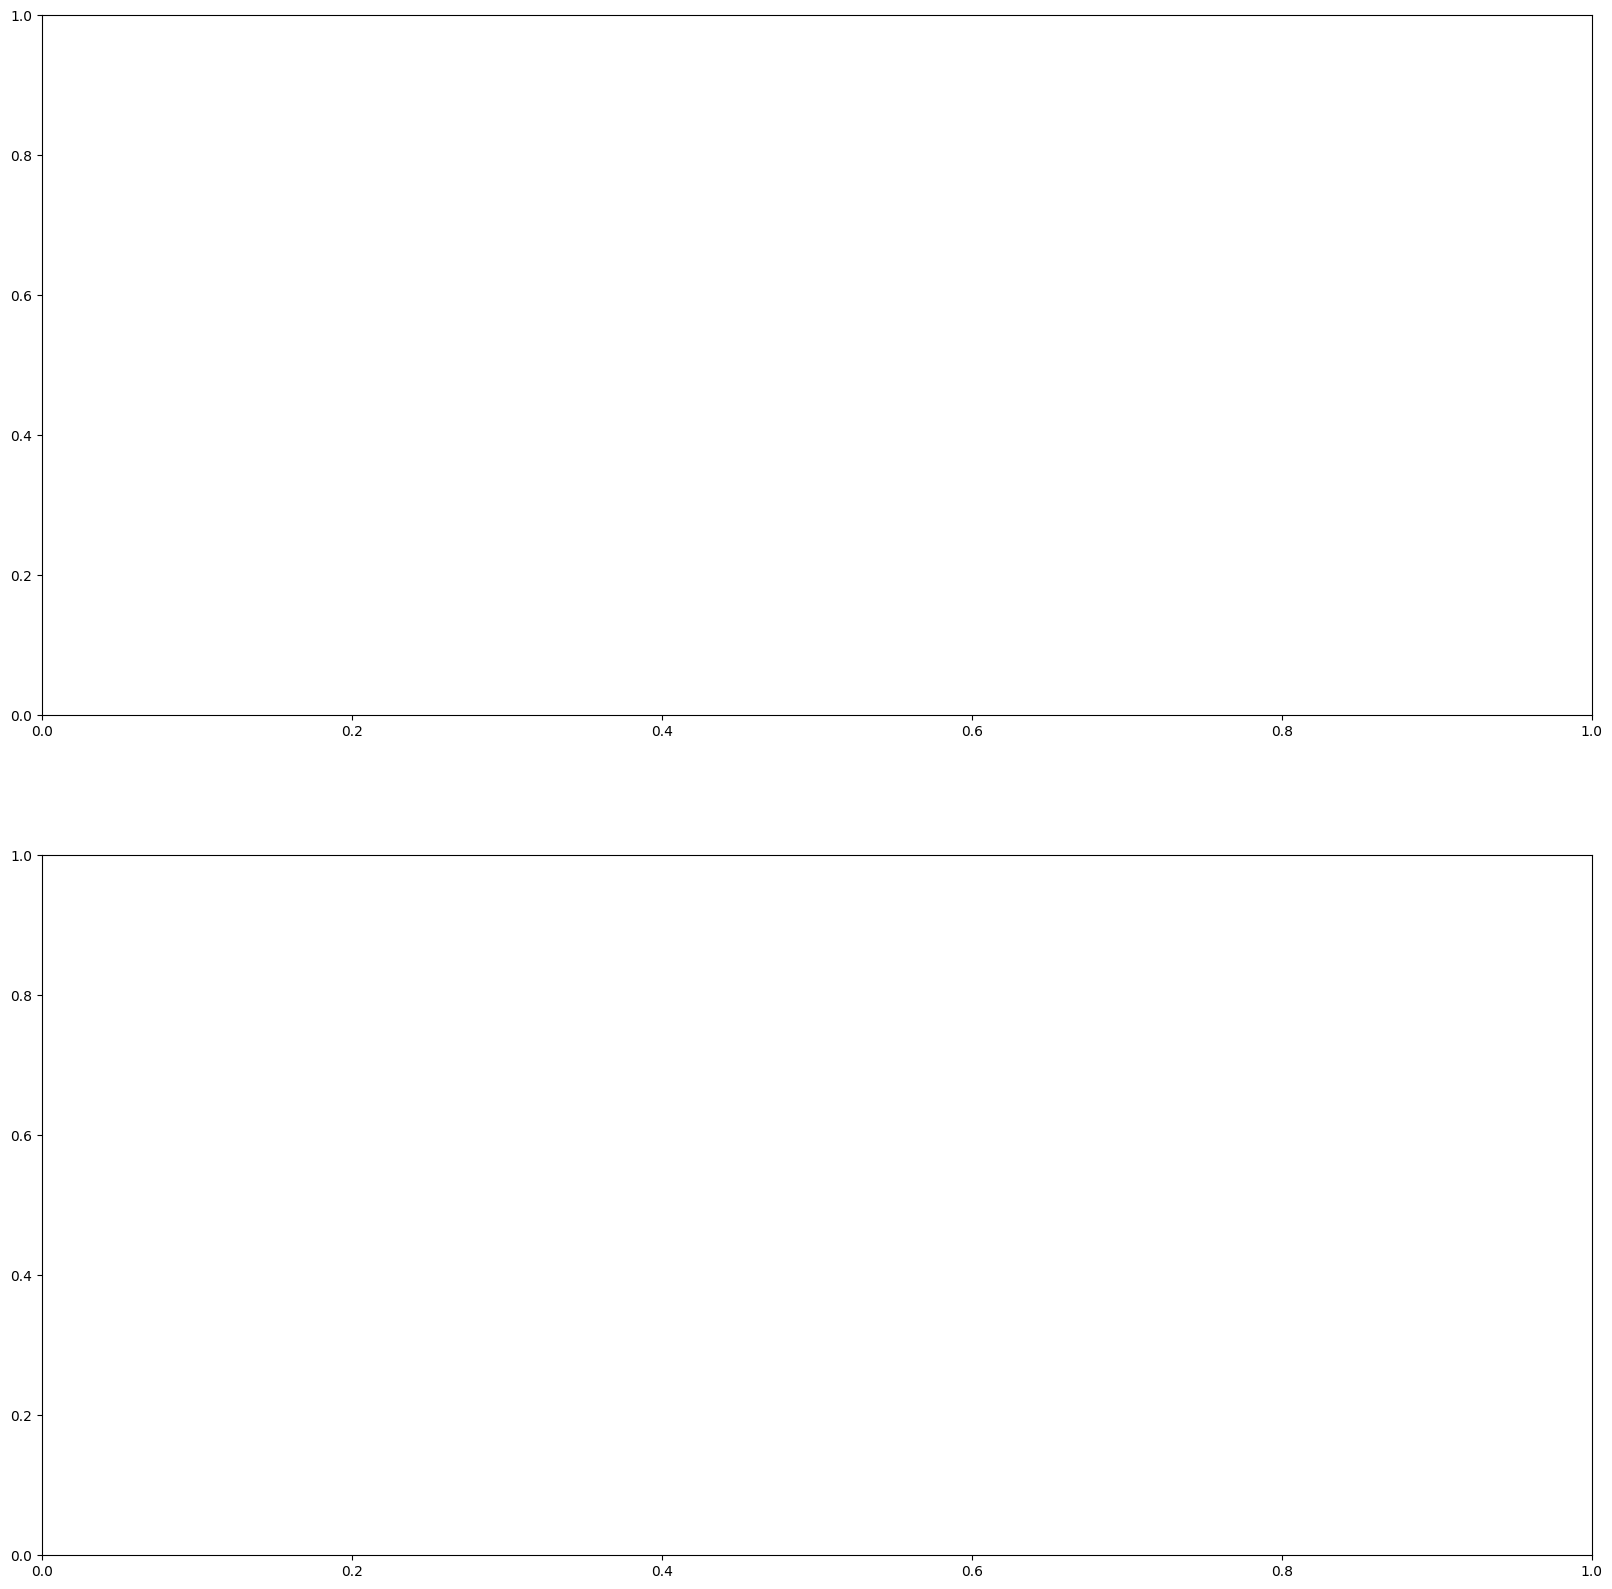

In [ ]:
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(torch.Tensor(test_pred.predictions))

preds = np.zeros(probs.shape)
# next, use threshold to turn them into integer predictions
preds[np.where(probs >= 0.5)] = 1 # threshold 0.5 but could test others!

import sklearn.metrics

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))

display = sklearn.metrics.RocCurveDisplay.from_predictions(
    np.array(trues).ravel(),
    np.array(preds).ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
    ax=ax1
)
roc_auc = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

display2 = sklearn.metrics.RocCurveDisplay.from_predictions(
    np.array(trues).ravel(),
    np.array(probs).ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
    ax=ax2
)
roc_auc2 = display2.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)



In [ ]:
predictions = test_pred.predictions

sigmoid = torch.nn.Sigmoid()
probs = sigmoid(torch.Tensor(predictions))
preds = np.zeros(probs.shape)
# next, use threshold to turn them into integer predictions



preds[np.where(probs >= 0.5)] = 1 # threshold 0.5 but could test others!

pred_label = []

for i in range(len(preds)):
  if sum(preds[i]) > 0:
    # if toxic
      pred_label.append(1)
  else:
    # if clean
      pred_label.append(0)

print(classification_report(trues, pred_label, target_names=["clean", "toxic"]))

              precision    recall  f1-score   support

       clean       0.98      0.92      0.95     57735
       toxic       0.54      0.86      0.66      6243

    accuracy                           0.91     63978
   macro avg       0.76      0.89      0.81     63978
weighted avg       0.94      0.91      0.92     63978



In [ ]:
for text, prediction, true in zip(dataset["text"][20:30], pred_label, trues):
  print(text, "\n", "prediction:", prediction, "\n", "true:", true)

Mitä toimenpiteitä kannattaa valita, jotta \ud83c\udfe2 toimiston keittiö ja tauko-/lounashuoneet \ud83e\uddf9 pysyvät puhtaina ja puhtaina; span\u2026 @URL 
 prediction: 1 
 true: 1
@user @user Taloudellinen turvapaikka ei ole mikään asia. Eikä \u201cmy country is a shithole\u201d turvapaikka. \n\nHow m\u2026 @URL 
 prediction: 0 
 true: 1
jälkeenjäänyt myrkyllinen naisellisuus \ud83d\ude2a @URL 
 prediction: 1 
 true: 1
Lähden viikoksi, ja ensimmäinen ääliö, joka sekoaa tästä... 
 prediction: 1 
 true: 1
Scomo suurin homo Maddenin historiassa\ud83d\ude02\ud83d\ude02\ud83d\ude02\ud83d\ude02 hän vain haukkuu kaikkia, joilla on jotain tekemistä Maddenin kanssa, koska hän\u2026 @URL 
 prediction: 0 
 true: 0
Nyt Trump vihaa juutalaisia lmfao te neekerit olette täysiä jälkeenjääneitä. Tiedättehän, että hän työskentelee @userille ja @userille? An\u2026 @URL 
 prediction: 1 
 true: 1
@user @user Honduras Guatemala???? Pidettäisiinkö näitäkin paskamaina? 
 prediction: 1 
 true: 1
Dawg Rondo 

In [ ]:
def id_and_label(data):
    df = pd.DataFrame(data, columns=['gold_labels', 'predicted_labels', 'text']) # 'id',
    return df

#ids = dataset["id"] do i need these? I guess

all_labels = []
for i in range(len(pred_label)):
    if pred_label[i] == 1:
      all_labels.append("toxic")
    else:
      all_labels.append("non-toxic")

gold_labels = []
for i in range(len(trues)):
    if trues[i] == 1:
      gold_labels.append("toxic")
    else:
      gold_labels.append("non-toxic")


all = tuple(zip(gold_labels, all_labels, texts))
allpredict = [item for item in all]

all_dataframe = id_and_label(allpredict)

# put to csv so we don't need any new lines taken out
filename = str(filename)+"-predictions.tsv"
all_dataframe.to_csv(filename, sep="\t", index=False) # added sep to make tsv

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['Precision', 'Recall', 'F1-score']

# Manually extract values row by row from your original data
# or loop through if loaded from CSV or another source

# Example for hardcoded data:
# data_dict = {
#     'Davidson et. al': {'Non-toxic': [0.54, 0.85, 0.66], 'Toxic': [0.97, 0.85, 0.90]},
#     'Ousidhoum et. al': {'Non-toxic': [0.18, 0.66, 0.28], 'Toxic': [0.90, 0.51, 0.65]},
#     'Qian et. al': {'Non-toxic': [0.91, 0.77, 0.84], 'Toxic': [0.51, 0.76, 0.61]},
#     'Waseem and Hovy': {'Non-toxic': [0.76, 0.87, 0.81], 'Toxic': [0.41, 0.24, 0.30]},
#     'Zampieri et. al': {'Non-toxic': [0.78, 0.94, 0.85], 'Toxic': [0.78, 0.46, 0.58]},
#     'Founta et. al': {'Non-toxic': [0.76, 0.96, 0.85], 'Toxic': [0.87, 0.78, 0.75]},
#     'B&P LOL': {'Non-toxic': [0.99, 0.86, 0.92], 'Toxic': [0.28, 0.76, 0.41]},
#     'B&P WOW': {'Non-toxic': [0.99, 0.75, 0.58], 'Toxic': [0.14, 0.65, 0.23]},
#     'Novak et. al': {'Non-toxic': [0.72, 0.92, 0.81], 'Toxic': [0.62, 0.27, 0.38]},
# }

# data_dict = {
#     'All': {'Non-toxic': [0.80, 0.56, 0.66], 'Toxic': [0.66, 0.86, 0.75]},
#     'Jigsaw': {'Non-toxic': [0.78, 0.54, 0.64], 'Toxic': [0.65, 0.84, 0.73]},
#     'Davidson et. al': {'Non-toxic': [0.80, 0.56, 0.66], 'Toxic': [0.66, 0.86, 0.75]},
#     'Ousidhoum et. al': {'Non-toxic': [0.77, 0.52, 0.62], 'Toxic': [0.64, 0.84, 0.73]},
#     'Qian et. al': {'Non-toxic': [0.77, 0.52, 0.62], 'Toxic': [0.64, 0.85, 0.73]},
#     'Waseem and Hovy': {'Non-toxic': [0.79, 0.55, 0.65], 'Toxic': [0.66, 0.85, 0.74]},
#     'Zampieri et. al': {'Non-toxic': [0.80, 0.53, 0.64], 'Toxic': [0.65, 0.87, 0.74]},
#     'Founta et. al': {'Non-toxic': [0.79, 0.58, 0.67], 'Toxic': [0.67, 0.84, 0.75]},
#     'B&P LOL': {'Non-toxic': [0.79, 0.52, 0.63], 'Toxic': [0.64, 0.87, 0.74]},
#     'B&P WOW': {'Non-toxic': [0.81, 0.53, 0.64], 'Toxic': [0.65, 0.87, 0.75]},
#     'Novak et. al': {'Non-toxic': [0.79, 0.49, 0.61], 'Toxic': [0.63, 0.87, 0.73]},
# }

data_dict = {
    'Jigsaw': {'Non-toxic': [0.97, 0.88, 0.92], 'Toxic': [0.41, 0.76, 0.53]},
    'Davidson et. al': {'Non-toxic': [0.52, 0.76, 0.62], 'Toxic': [0.95, 0.86, 0.90]},
    'Ousidhoum et. al': {'Non-toxic': [0.19, 0.52, 0.28], 'Toxic': [0.89, 0.63, 0.74]},
    'Qian et. al': {'Non-toxic': [0.92, 0.76, 0.83], 'Toxic': [0.50, 0.78, 0.61]},
    'Waseem and Hovy': {'Non-toxic': [0.79, 0.83, 0.81], 'Toxic': [0.45, 0.38, 0.41]},
    'Zampieri et. al': {'Non-toxic': [0.79, 0.80, 0.80], 'Toxic': [0.59, 0.56, 0.58]},
    'Founta et. al': {'Non-toxic': [0.74, 0.94, 0.83], 'Toxic': [0.78, 0.39, 0.52]},
    'B&P LOL': {'Non-toxic': [0.98, 0.93, 0.95], 'Toxic': [0.28, 0.57, 0.38]},
    'B&P WOW': {'Non-toxic': [0.98, 0.87, 0.92], 'Toxic': [0.14, 0.60, 0.23]},
    'Novak et. al': {'Non-toxic': [0.73, 0.86, 0.79], 'Toxic': [0.56, 0.35, 0.43]},
}



rows = []

for dataset, label_dict in data_dict.items():
    for label, values in label_dict.items():
        for metric, value in zip(metrics, values):
            rows.append({
                'dataset': dataset,
                'label': label,
                'metric': metric,
                'value': value
            })

# Convert to DataFrame
df_long = pd.DataFrame(rows)

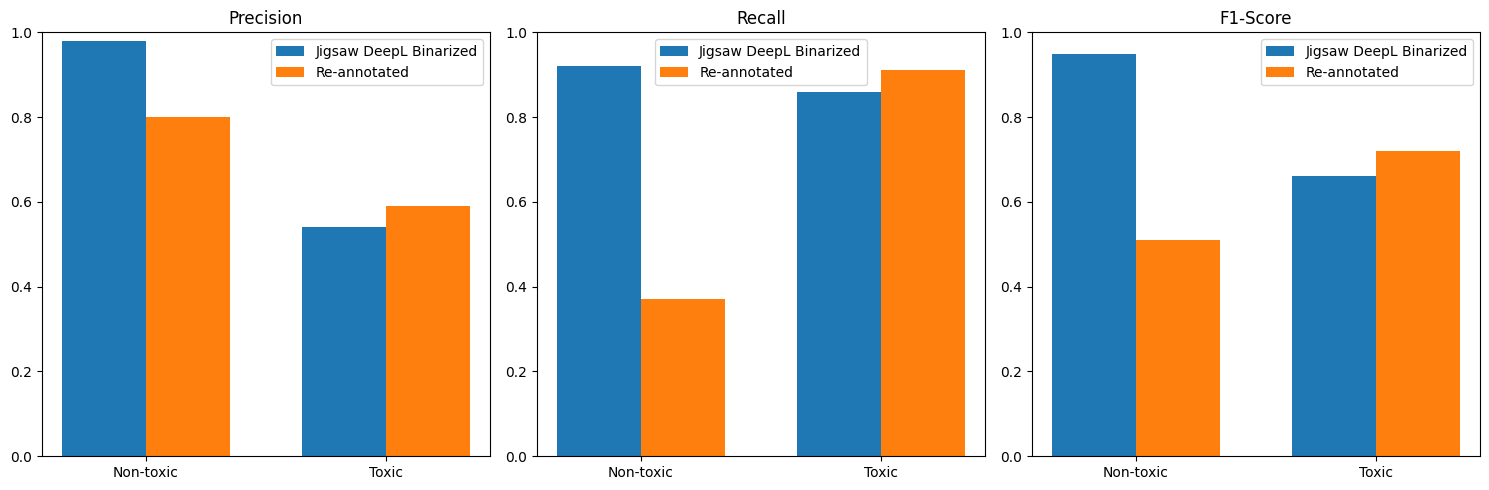

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
labels = ['Non-toxic', 'Toxic']
binarized_precision = [0.98, 0.54]
binarized_recall = [0.92, 0.86]
binarized_f1 = [0.95, 0.66]

existing_precision = [0.80, 0.59]
existing_recall = [0.37, 0.91]
existing_f1 = [0.51, 0.72]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Precision
axs[0].bar(x - width/2, binarized_precision, width, label='Jigsaw DeepL Binarized')
axs[0].bar(x + width/2, existing_precision, width, label='Re-annotated')
axs[0].set_title('Precision')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].set_ylim(0, 1)
axs[0].legend()

# Recall
axs[1].bar(x - width/2, binarized_recall, width, label='Jigsaw DeepL Binarized')
axs[1].bar(x + width/2, existing_recall, width, label='Re-annotated')
axs[1].set_title('Recall')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].set_ylim(0, 1)
axs[1].legend()

# F1-score
axs[2].bar(x - width/2, binarized_f1, width, label='Jigsaw DeepL Binarized')
axs[2].bar(x + width/2, existing_f1, width, label='Re-annotated')
axs[2].set_title('F1-Score')
axs[2].set_xticks(x)
axs[2].set_xticklabels(labels)
axs[2].set_ylim(0, 1)
axs[2].legend()

#plt.suptitle('Comparison of Class Label Metrics')
plt.tight_layout()
plt.show()

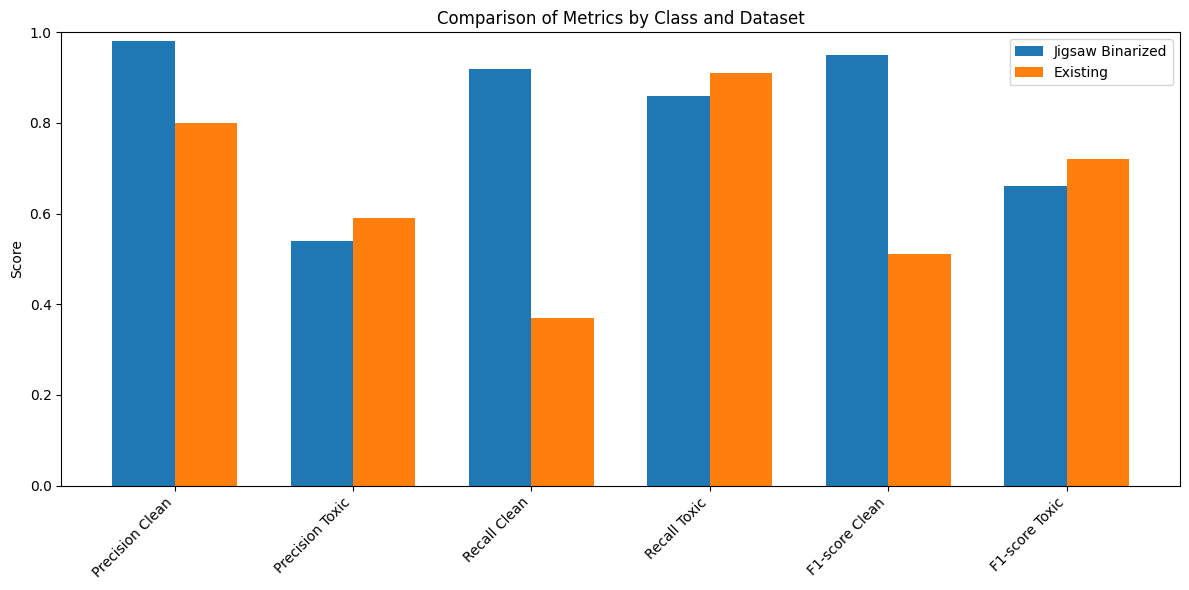

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Precision', 'Recall', 'F1-score']
classes = ['Clean', 'Toxic']

# Flattened x-axis labels
x_labels = [f'{m} {c}' for m in metrics for c in classes]

# Jigsaw Binarized results
binarized_values = [
    0.98, 0.54,   # Precision
    0.92, 0.86,   # Recall
    0.95, 0.66    # F1-score
]

# Existing results
existing_values = [
    0.80, 0.59,   # Precision
    0.37, 0.91,   # Recall
    0.51, 0.72    # F1-score
]

x = np.arange(len(x_labels))  # label locations
width = 0.35  # width of bars

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, binarized_values, width, label='Jigsaw Binarized')
bars2 = ax.bar(x + width/2, existing_values, width, label='Existing')

# Formatting
ax.set_ylabel('Score')
ax.set_title('Comparison of Metrics by Class and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_ylim(0, 1)
ax.legend()

plt.tight_layout()
plt.show()


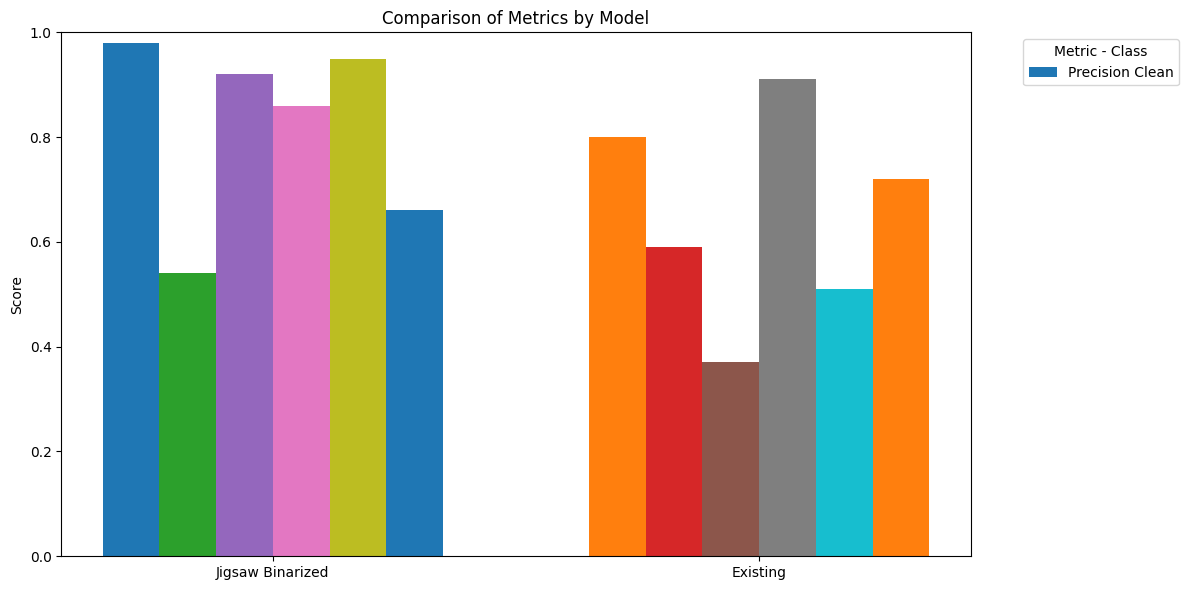

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Categories within each model group
subcategories = [
    'Precision Clean', 'Precision Toxic',
    'Recall Clean', 'Recall Toxic',
    'F1-score Clean', 'F1-score Toxic'
]

# Data for both models
binarized_values = [0.98, 0.54, 0.92, 0.86, 0.95, 0.66]
existing_values  = [0.80, 0.59, 0.37, 0.91, 0.51, 0.72]

# Number of groups (2 models)
num_models = 2
num_subcategories = len(subcategories)

# Bar positions
group_width = 0.7
bar_width = group_width / num_subcategories

x = np.arange(num_models)  # [0, 1]

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each subcategory
for i in range(num_subcategories):
    # Offset within each model group
    offset = (i - num_subcategories/2) * bar_width + bar_width/2
    ax.bar(x[0] + offset, binarized_values[i], bar_width, label=subcategories[i] if i == 0 else "")
    ax.bar(x[1] + offset, existing_values[i], bar_width)

# Formatting
ax.set_ylabel('Score')
ax.set_title('Comparison of Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(['Jigsaw Binarized', 'Existing'])
ax.set_ylim(0, 1)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Metric - Class")

plt.tight_layout()
plt.show()


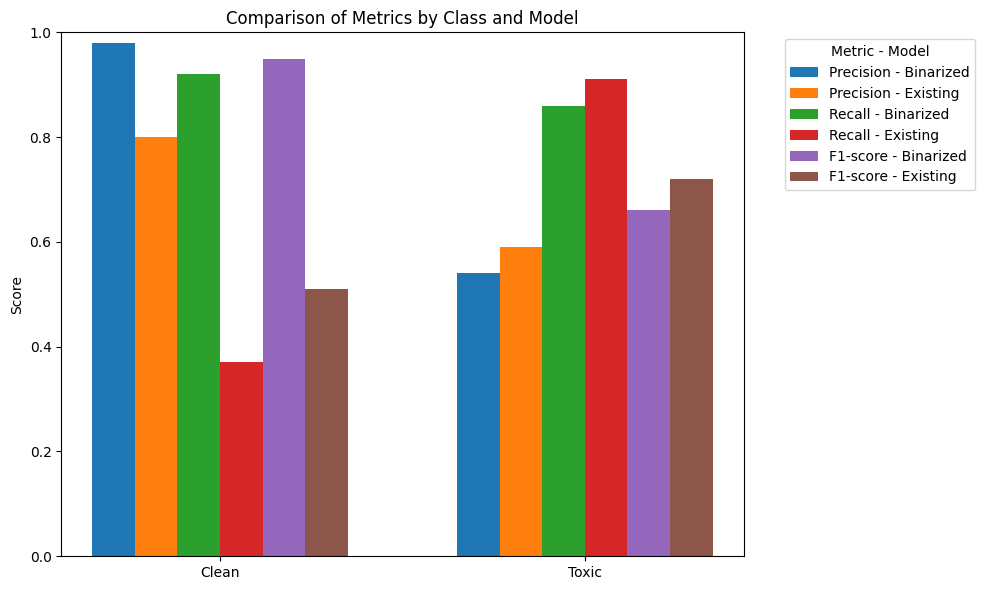

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Classes
classes = ['Clean', 'Toxic']

# Metrics
metrics = ['Precision', 'Recall', 'F1-score']

# Data: [Precision, Recall, F1-score] for each class and model
binarized_clean = [0.98, 0.92, 0.95]
binarized_toxic = [0.54, 0.86, 0.66]
existing_clean  = [0.80, 0.37, 0.51]
existing_toxic  = [0.59, 0.91, 0.72]

# Bar positions
x = np.arange(len(classes))  # [0, 1]
num_metrics = len(metrics)
group_width = 0.7
bar_width = group_width / (num_metrics * 2)  # 2 models per metric

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric and model
for i, metric in enumerate(metrics):
    # Offset for each metric
    metric_offset = (i - 1) * 2 * bar_width
    ax.bar(x + metric_offset - bar_width/2, [binarized_clean[i], binarized_toxic[i]], bar_width, label=f'{metric} - Binarized')
    ax.bar(x + metric_offset + bar_width/2, [existing_clean[i], existing_toxic[i]], bar_width, label=f'{metric} - Existing')

# Formatting
ax.set_ylabel('Score')
ax.set_title('Comparison of Metrics by Class and Model')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Metric - Model')
plt.tight_layout()
plt.show()


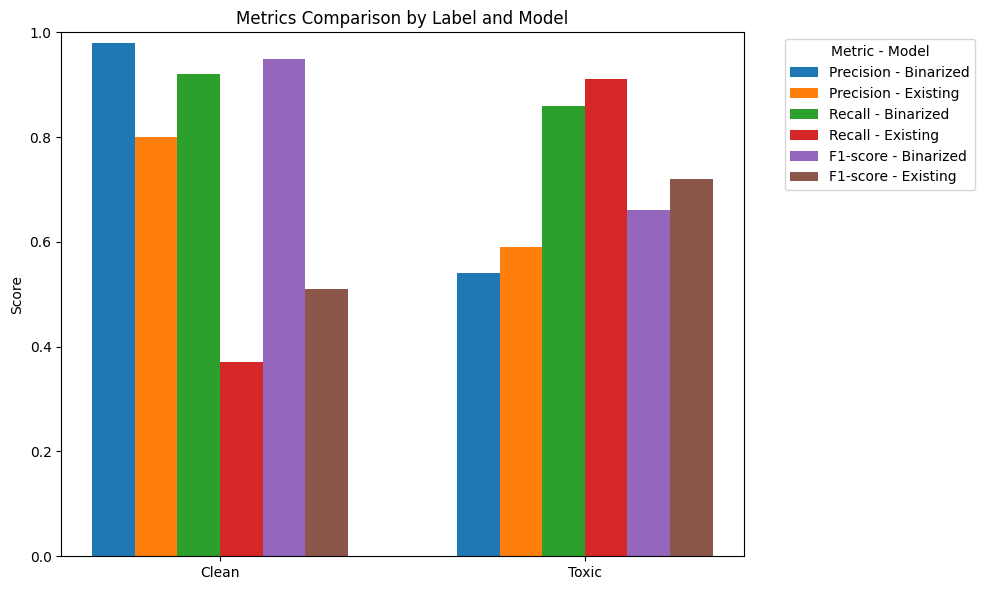

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
labels = ['Clean', 'Toxic']

# Metrics
metrics = ['Precision', 'Recall', 'F1-score']

# Data: [Precision, Recall, F1-score] for each label and model
binarized_clean = [0.98, 0.92, 0.95]
binarized_toxic = [0.54, 0.86, 0.66]
existing_clean  = [0.80, 0.37, 0.51]
existing_toxic  = [0.59, 0.91, 0.72]

# Bar positions
x = np.arange(len(labels))  # [0, 1]
num_metrics = len(metrics)
group_width = 0.7
bar_width = group_width / (num_metrics * 2)  # 2 models per metric

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric and model
for i, metric in enumerate(metrics):
    metric_offset = (i - 1) * 2 * bar_width
    ax.bar(x + metric_offset - bar_width/2, [binarized_clean[i], binarized_toxic[i]], bar_width, label=f'{metric} - Binarized')
    ax.bar(x + metric_offset + bar_width/2, [existing_clean[i], existing_toxic[i]], bar_width, label=f'{metric} - Existing')

# Formatting
ax.set_ylabel('Score')
ax.set_title('Metrics Comparison by Label and Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Metric - Model')
plt.tight_layout()
plt.show()


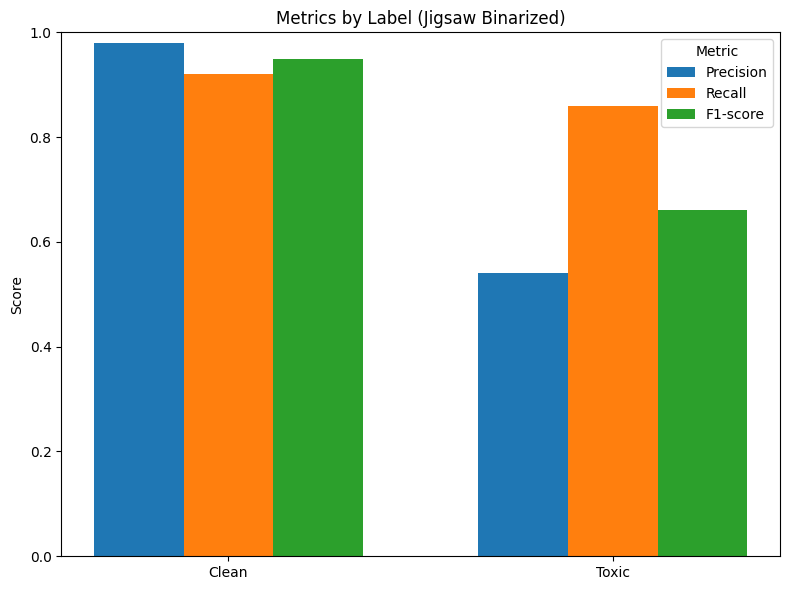

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
labels = ['Clean', 'Toxic']

# Metrics
metrics = ['Precision', 'Recall', 'F1-score']

# Data for Jigsaw Binarized model
binarized_clean = [0.98, 0.92, 0.95]
binarized_toxic = [0.54, 0.86, 0.66]

# Bar positions
x = np.arange(len(labels))  # [0, 1]
num_metrics = len(metrics)
group_width = 0.7
bar_width = group_width / num_metrics

fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each metric
for i, metric in enumerate(metrics):
    offset = (i - 1) * bar_width
    ax.bar(x + offset, [binarized_clean[i], binarized_toxic[i]], bar_width, label=metric)

# Formatting
ax.set_ylabel('Score')
ax.set_title('Metrics by Label (Jigsaw Binarized)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend(title='Metric')
plt.tight_layout()
plt.show()


<ipython-input-9-f4815f21629e>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-9-f4815f21629e>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-9-f4815f21629e>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


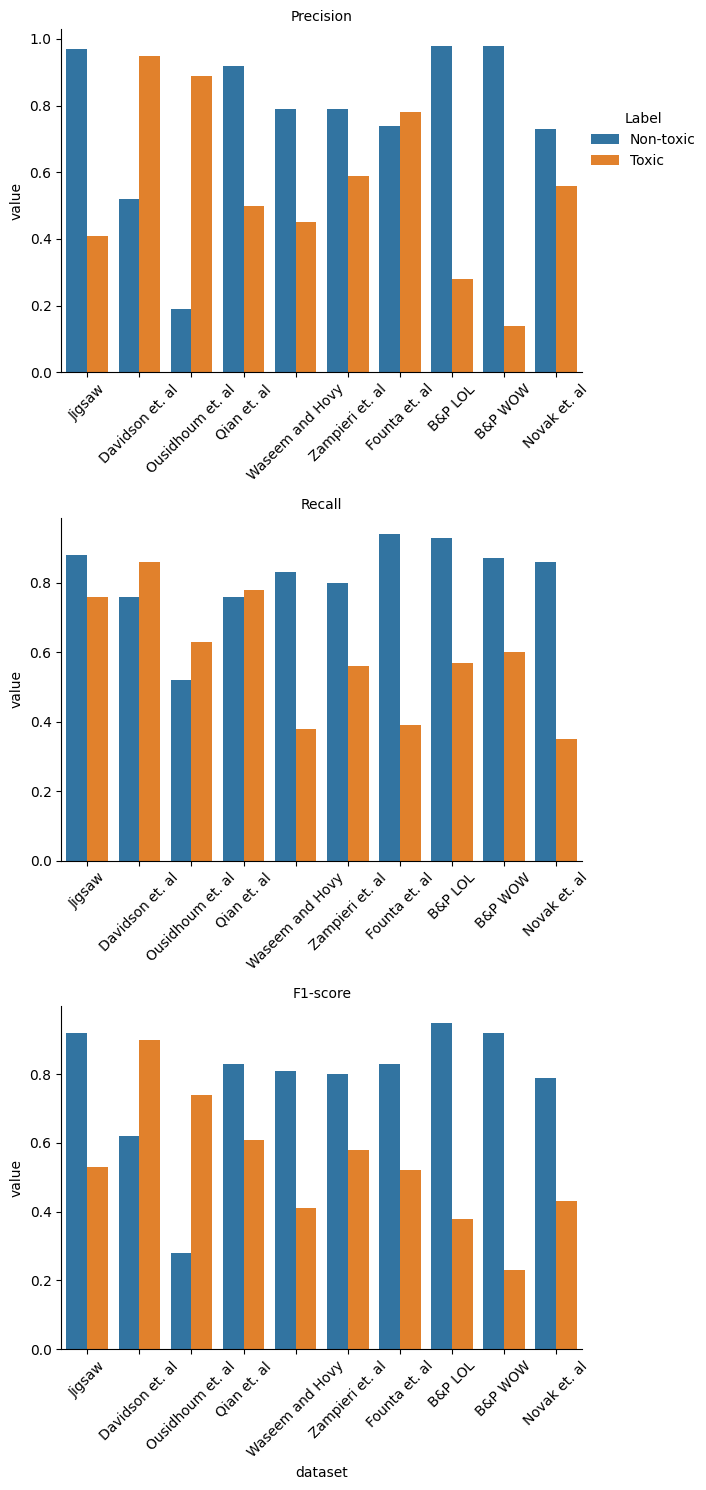

In [ ]:
# # Step 2: Create the plot
# plt.figure(figsize=(12, 6))
# sns.barplot(data=df_long, x='dataset', y='value', hue='label', palette='Set2', ci=None, dodge=True, edgecolor='black',
#             hue_order=['clean', 'toxic'])

g = sns.catplot(
    data=df_long,
    kind='bar',
    x='dataset',
    y='value',
    hue='label',
    row='metric',
    sharex=False,
    sharey=False
)
g.set_titles("{row_name}")
#g.set_axis_labels("Dataset", "Score")
g._legend.set_title("Label")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #ax.set_xlabel("Dataset")
g._legend.set_bbox_to_anchor((1.15, 0.90))  # push it much farther out
plt.tight_layout()
plt.savefig("small_results_new.png", dpi=300, bbox_inches='tight')
plt.show()

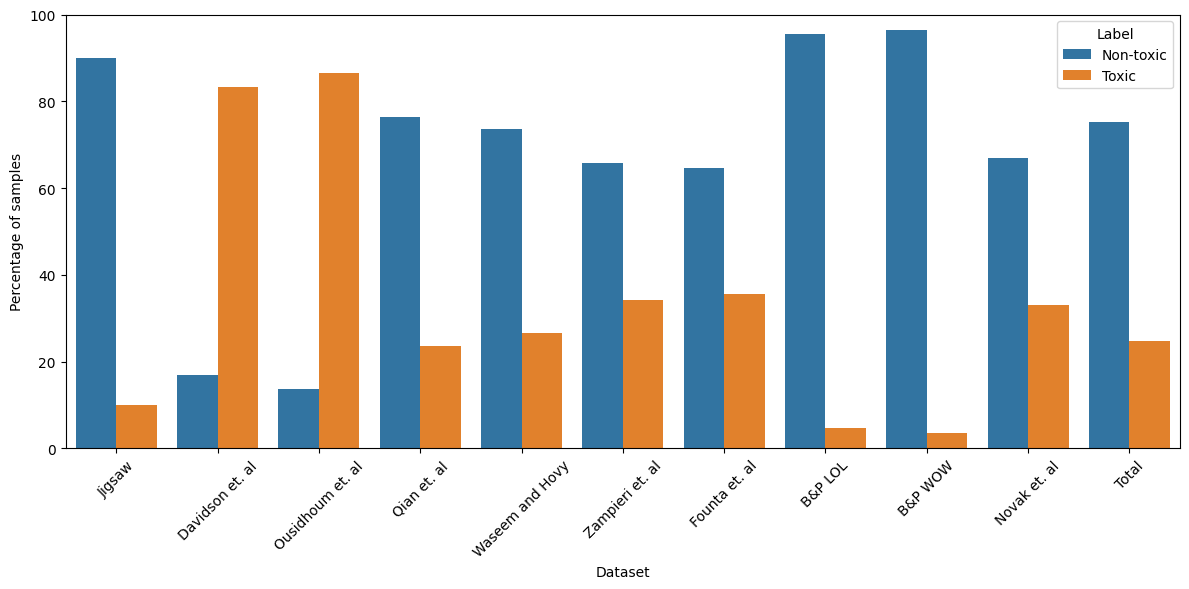

In [ ]:
# Raw data
data = {
    'Dataset': [
        'Jigsaw', 'Davidson et. al', 'Ousidhoum et. al', 'Qian et. al', 'Waseem and Hovy',
        'Zampieri et. al', 'Founta et. al', 'B&P LOL', 'B&P WOW', 'Novak et. al', 'Total'
    ],
    'Non-toxic': [
        201081, 4163, 1307, 17062, 7393, 8440, 33191, 1739, 1115, 52606, 328097
    ],
    'Toxic': [
        22468, 20620, 8304, 5255, 2663, 4400, 18263, 84, 40, 25928, 108025
    ]
}

# Create dataframe
df = pd.DataFrame(data)

# Calculate percentages
df['Total'] = df['Non-toxic'] + df['Toxic']
df['Non-toxic %'] = (df['Non-toxic'] / df['Total']) * 100
df['Toxic %'] = (df['Toxic'] / df['Total']) * 100

# Melt to long form
df_percent = df.melt(id_vars='Dataset', value_vars=['Non-toxic %', 'Toxic %'],
                     var_name='Label', value_name='Percentage')

# Clean up label names
df_percent['Label'] = df_percent['Label'].str.replace(' %', '')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_percent, x='Dataset', y='Percentage', hue='Label')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.ylabel("Percentage of samples")
#plt.title("Toxic vs Non-toxic (as % of dataset)")
plt.tight_layout()
plt.savefig("toxicity_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

